In [31]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from scipy.stats import norm, boxcox
sns.set()
import import_ipynb

In [3]:
df = pd.read_csv('train.csv')

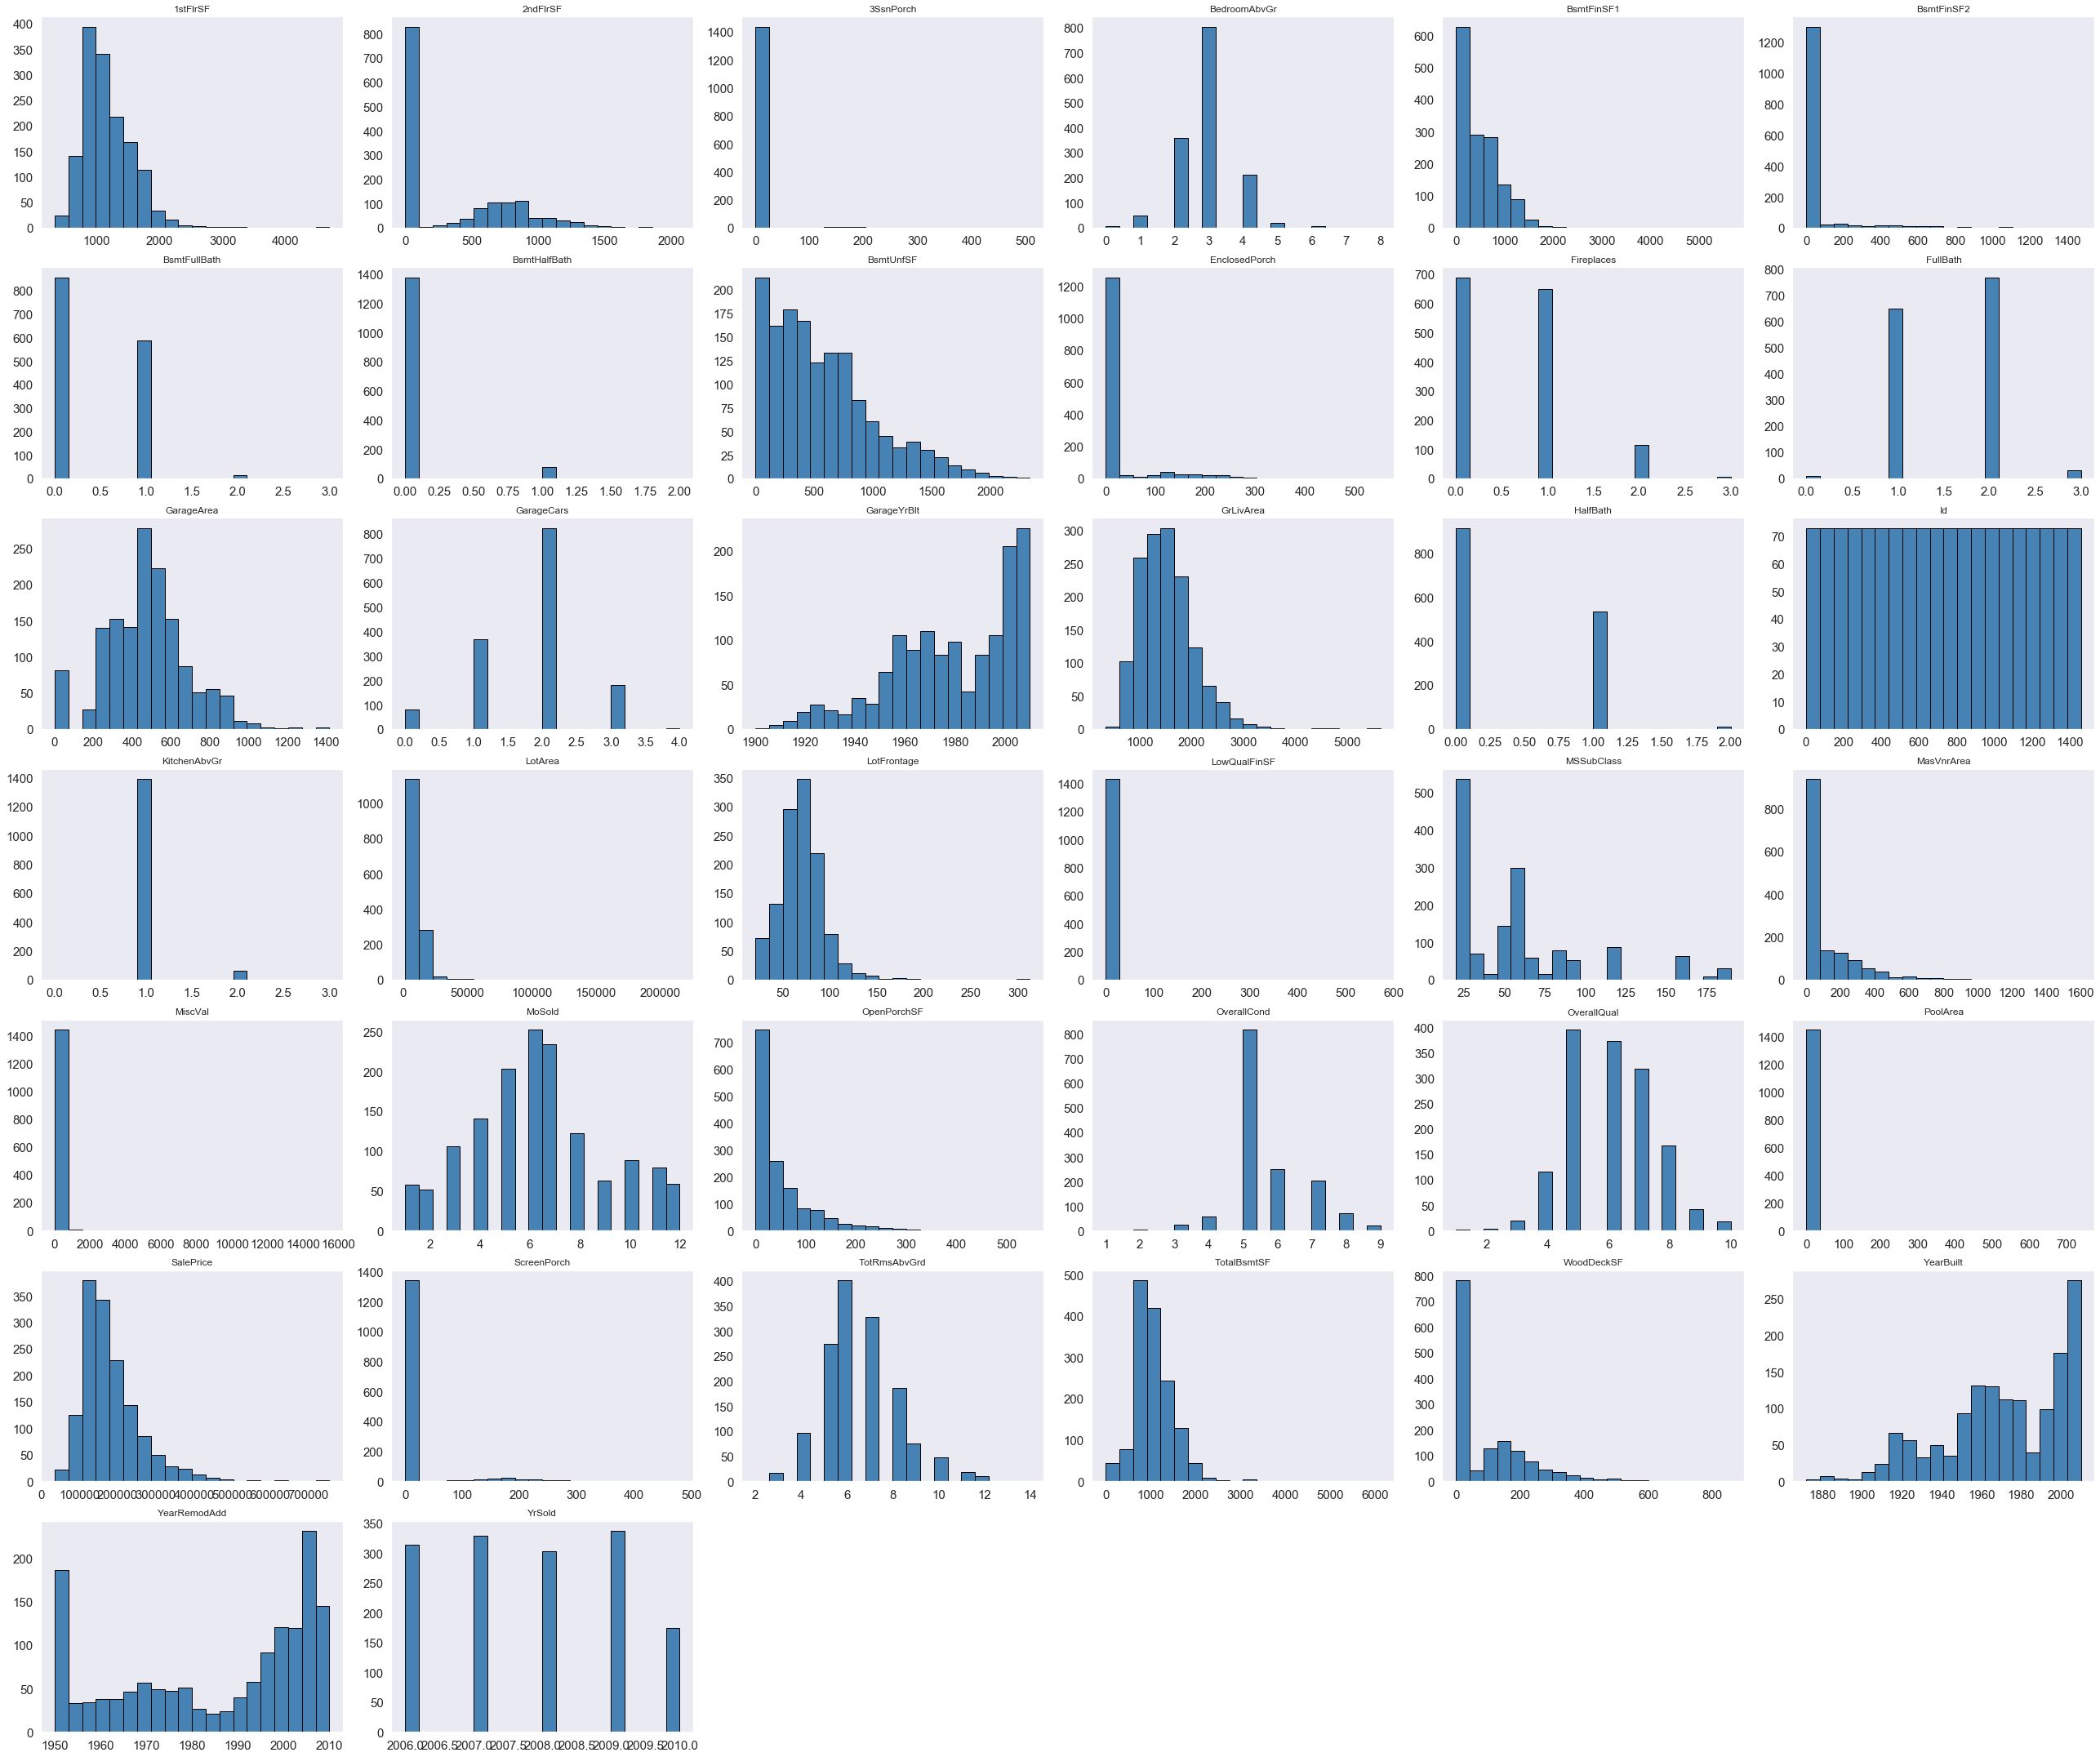

In [13]:
df.hist(bins=20, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=15, ylabelsize=15, grid=False, figsize = (30,25))    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))  

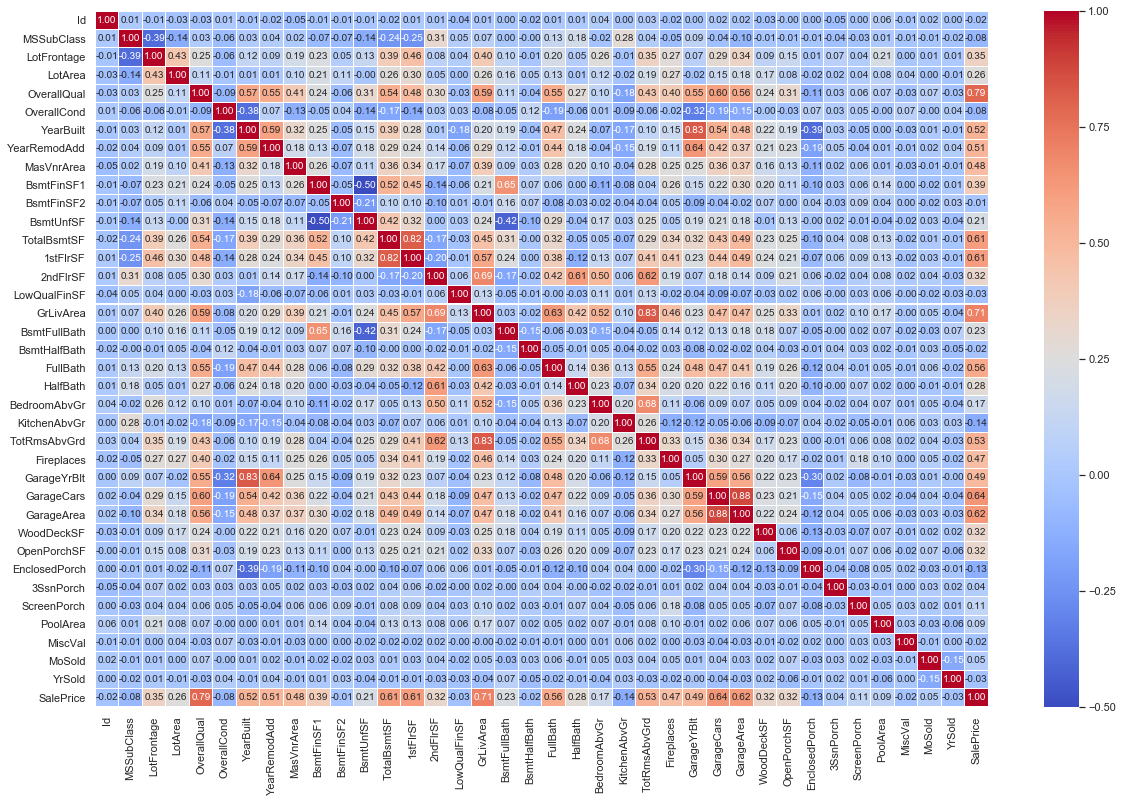

In [15]:
f, ax = plt.subplots(figsize=(20, 12))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)

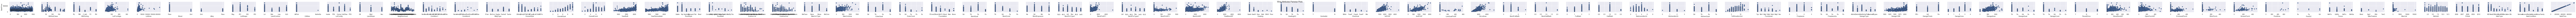

In [7]:
pp = sns.pairplot(df, height=1.8, aspect=1.8,  y_vars=['SalePrice'], x_vars=df.columns,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)

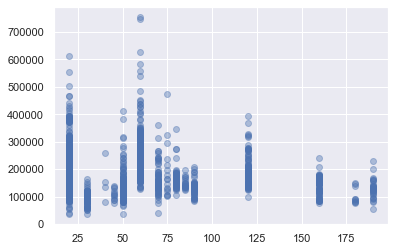

In [21]:

plt.scatter(df['MSSubClass'], df['SalePrice'],alpha=0.4 )
plt.show()

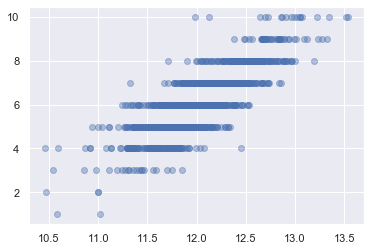

In [11]:
plt.scatter( np.log(df['SalePrice']),df['OverallQual'],alpha=0.4 )
plt.show()

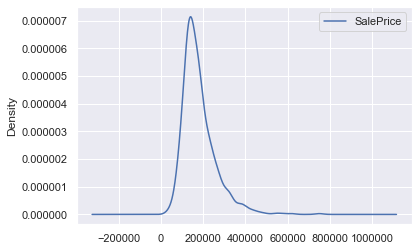

In [18]:
df.plot.kde(x='Id', y='SalePrice')

-0.07692396374428875


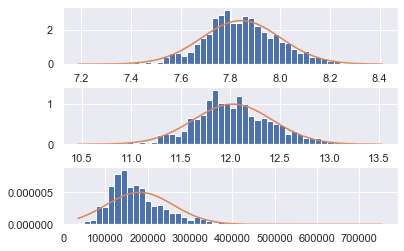

In [51]:
#plt.figure(1)

fig, (ax1, ax2,ax3) = plt.subplots(3)
fig.subplots_adjust(hspace=0.4, wspace=0.4)
data, lambd = boxcox(df['SalePrice'])
data2 = np.log(df['SalePrice'])
data3 = (df['SalePrice'])
print(lambd)
ax1.hist(data, density=True, bins=50)
ax2.hist(data2, density=True, bins=50)
ax3.hist(data3, density=True, bins=50)
#ax1.xlim((min(data), max(data)))

mean = np.mean(data)
variance = np.var(data)
sigma = np.sqrt(variance)
x = np.linspace(min(data), max(data), 100)
ax1.plot(x, norm.pdf(x, mean, sigma))

mean2 = np.mean(data2)
variance2 = np.var(data2)
sigma2 = np.sqrt(variance2)
x2 = np.linspace(min(data2), max(data2), 100)
ax2.plot(x2, norm.pdf(x2, mean2, sigma2))

mean3 = np.mean(data3)
variance3 = np.var(data3)
sigma3 = np.sqrt(variance3)
x3 = np.linspace(min(data3), max(data3), 100)
ax3.plot(x3, norm.pdf(x3, mean3, sigma3))

plt.show()